In [1]:
 !pip install rake_nltk
from rake_nltk import Rake   

import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/deja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df= pd.read_csv('amazon_co-ecommerce_sample.csv')
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [4]:
df.nunique()

uniq_id                                        10000
product_name                                    9964
manufacturer                                    2651
price                                           2625
number_available_in_stock                         89
number_of_reviews                                194
number_of_answered_questions                      19
average_review_rating                             19
amazon_category_and_sub_category                 255
customers_who_bought_this_item_also_bought      8755
description                                     8514
product_information                             9939
product_description                             8514
items_customers_buy_after_viewing_this_item     6749
customer_questions_and_answers                   910
customer_reviews                                9901
sellers                                         6581
dtype: int64

In [5]:
for col in df.columns:
    print(col, end=': ')
    print(df[col].unique())

uniq_id: ['eac7efa5dbd3d667f26eb3d3ab504464' 'b17540ef7e86e461d37f3ae58b7b72ac'
 '348f344247b0c1a935b1223072ef9d8a' ... 'bf6cc073f8f24e6e338190fa16f6ee9d'
 'cd783d0b8b44e631b9788b203eaaefae' '94d18e86e504bee1e392df7e5738b18a']
product_name: ['Hornby 2014 Catalogue'
 'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke'
 'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY'
 ... 'Defiance Lawkeeper Metal Badge Prop Replica'
 'Justice League of America Series 3 Green Lantern Action Figure'
 'Star Wars 1/72 Y-Wing Starfighter']
manufacturer: ['Hornby' 'FunkyBuys' 'ccf' ... 'Captain america' 'IronMan' 'Super Heroes']
price: ['£3.42' '£16.99' '£9.99' ... '£29.79' '£49.81' '£21.20']
number_available_in_stock: ['5\xa0new' nan '2\xa0new' '3\xa0new' '4\xa0new' '1\xa0new' '6\xa0new'
 '18\xa0new' '12\xa0new' '1\xa0used' '26\xa0new' '37\xa0new' '35\xa0new'
 '22\xa0new' '11\xa0new' '16\xa0new' '31\xa0new' '9\x

In [6]:
# type of entries, how many missing values/null fields
df.info()
print('\nMissing values:  ', df.isnull().sum().values.sum())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [7]:
df = df.drop(['customer_questions_and_answers'], axis=1) 

In [8]:
df.number_of_answered_questions=df.number_of_answered_questions.fillna(0)

In [9]:
 #removing £ from values 
df['price'] = df['price'].replace({'\£':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g P

In [10]:
df['price'] = df['price'].replace({'\,':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g P

In [11]:
#take out hyphen and everything after
df['price'] = df['price'].str.split('-').str[0]

In [12]:
#converting from string to float
df['price'] = df['price'].astype(float)

In [13]:
#checking for conversion done
df.price.dtype

dtype('float64')

In [14]:
#check for missing values
df.price.isnull().any()

True

In [15]:
#fill missing values with 0
meanprice = np.mean(df.price)
df.price = df.price.fillna(meanprice)

In [16]:
#verify values were filled
df.price.isnull().any()

False

In [17]:
df.price.describe()

count    10000.000000
mean        20.278110
std         42.891195
min          0.010000
25%          5.950000
50%         12.990000
75%         20.278110
max       2439.920000
Name: price, dtype: float64

<AxesSubplot:>

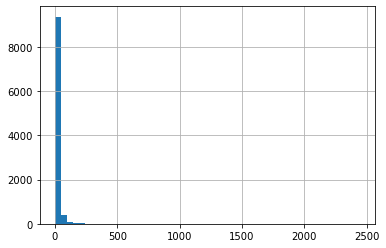

In [18]:
df['price'].hist(bins=50)

In [19]:
df['description_of_product']=df[['description', 'product_description']].apply(lambda x: ''.join(str(x)), axis=1)

In [20]:
df['description_of_product'].drop_duplicates()

0       description            Product Description Hor...
1       description            Size Name:Large FunkyBu...
2       description            BIG CLASSIC TOY TRAIN S...
3       description            Hornby 00 Gauge BR Hawk...
4       description            Product Description Hor...
                              ...                        
9995    description            DC 66 Batman Classic TV...
9996    description            NaN\nproduct_descriptio...
9997    description            *Includes 1x Badge with...
9998    description            Designed by Ed BenesIt'...
9999    description            NaN\nproduct_descriptio...
Name: description_of_product, Length: 10000, dtype: object

In [21]:
df = df.drop(['description','product_description'], axis=1)

In [22]:
df.description_of_product.isnull().sum()

0

In [23]:
def mapnumber_of_reviews(v): 
    if pd.isnull(v):
        return 0
    try:
        vv = v.replace(",","")
        return int(vv)
    except ValueError:
        return 0

In [24]:
if df['number_of_reviews'].dtype != 'int64':  
    df['number_of_reviews'] = df['number_of_reviews'].map(mapnumber_of_reviews)

In [25]:
#make rating numerical
def mapaverage_review_rating(v): 
    if pd.isnull(v):
        return 0
    try:
        vv = v.split('out')[0][0].strip()
        return float(vv)
    except ValueError:        
        return 0  

In [26]:
if df['average_review_rating'].dtype != 'float64':
    df['average_review_rating'] = df['average_review_rating'].map(mapaverage_review_rating)

In [27]:
df['average_review_rating']

0       4.0
1       4.0
2       3.0
3       5.0
4       4.0
       ... 
9995    5.0
9996    4.0
9997    5.0
9998    5.0
9999    4.0
Name: average_review_rating, Length: 10000, dtype: float64

In [28]:
#Splitting number_available_in_stock into two columns number_available and number_available_status
stock = pd.DataFrame(df.number_available_in_stock.astype(str).str.split('\xa0',1).tolist(),
                                   columns = ['number_available','number_availability_status'])

In [29]:
#checking for the split in columns
stock

,number_available,number_availability_status
0,5,new
1,nan,None
2,2,new
3,nan,None
4,nan,None
...,...,...
9995,5,new
9996,nan,None
9997,3,new
9998,3,new


In [30]:
#combine dataframes
df = pd.concat([df, stock], axis=1, ignore_index=False)

In [31]:
#check concatenation
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers', 'description_of_product', 'number_available',
       'number_availability_status'],
      dtype='object')

In [32]:
 #dropping column number_available_in_stock
df.drop(['number_available_in_stock'],axis=1, inplace=True)

In [33]:
#checking for drop
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers', 'description_of_product', 'number_available',
       'number_availability_status'],
      dtype='object')

In [34]:
df['number_available']=df['number_available'].astype(float)

In [35]:
df.number_available.isnull()

0       False
1        True
2       False
3        True
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Name: number_available, Length: 10000, dtype: bool

In [36]:
df['number_available'] = df.number_available.fillna(0)

In [37]:
df.customer_reviews=df['customer_reviews'].fillna("")

In [38]:
df.manufacturer=df['manufacturer'].fillna("")

In [39]:
df.product_information=df['product_information'].fillna("")

In [40]:
df.customers_who_bought_this_item_also_bought=df['customers_who_bought_this_item_also_bought'].fillna("")

In [41]:
df.items_customers_buy_after_viewing_this_item=df['items_customers_buy_after_viewing_this_item'].fillna("")

In [42]:
df.sellers=df['sellers'].fillna("")

In [43]:
df.number_availability_status=df['number_availability_status'].fillna("")

In [44]:
df.isnull().sum()

uniq_id                                          0
product_name                                     0
manufacturer                                     0
price                                            0
number_of_reviews                                0
number_of_answered_questions                     0
average_review_rating                            0
amazon_category_and_sub_category               690
customers_who_bought_this_item_also_bought       0
product_information                              0
items_customers_buy_after_viewing_this_item      0
customer_reviews                                 0
sellers                                          0
description_of_product                           0
number_available                                 0
number_availability_status                       0
dtype: int64

In [45]:
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_of_reviews                                int64
number_of_answered_questions                   float64
average_review_rating                          float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
product_information                             object
items_customers_buy_after_viewing_this_item     object
customer_reviews                                object
sellers                                         object
description_of_product                          object
number_available                               float64
number_availability_status                      object
dtype: object

In [46]:
# summary statistics for all numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10000.0,20.27811,42.891195,0.01,5.95,12.99,20.27811,2439.92
number_of_reviews,10000.0,9.12350,33.700000,0.00,1.00,2.00,6.00000,1399.00
number_of_answered_questions,10000.0,1.69460,2.467740,0.00,1.00,1.00,2.00000,39.00
average_review_rating,10000.0,4.50460,0.539081,0.00,4.00,5.00,5.00000,5.00
number_available,10000.0,5.93770,8.361077,0.00,0.75,3.00,7.00000,92.00


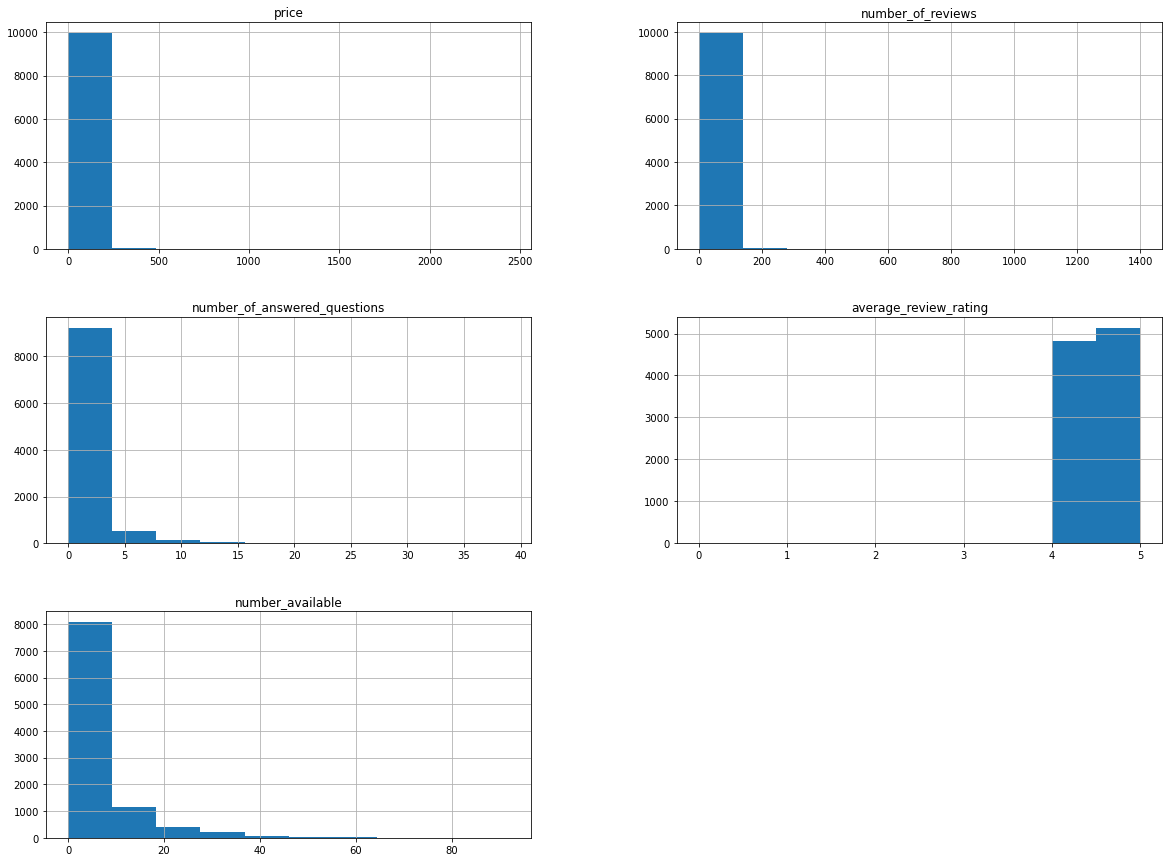

In [47]:
df.hist(figsize=(20, 15))
plt.show()

In [48]:
df.amazon_category_and_sub_category=df['amazon_category_and_sub_category'].fillna("")

In [49]:
print(df.amazon_category_and_sub_category[1])
print('\n')

for i in df.amazon_category_and_sub_category[1].split('>'):
    print(i)

Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains


Hobbies 
 Model Trains & Railway Sets 
 Rail Vehicles 
 Trains


In [50]:
df.amazon_category_and_sub_category[7].split('>')[1][1:]

'Model Trains & Railway Sets '

In [51]:
MainCategory = df['amazon_category_and_sub_category'].str.split('>',1).str[0]

In [52]:
print('Top Ten Main Categories.\n')
print(MainCategory.value_counts()[:10]) 

Top Ten Main Categories.

Hobbies                     1464
Die-Cast & Toy Vehicles     1221
Figures & Playsets          1111
Characters & Brands          960
Games                        941
Arts & Crafts                802
Party Supplies               694
                             690
Fancy Dress                  585
Sports Toys & Outdoor        372
Name: amazon_category_and_sub_category, dtype: int64


In [53]:
MainCategory

0                     Hobbies 
1                     Hobbies 
2                     Hobbies 
3                     Hobbies 
4                     Hobbies 
                 ...          
9995                  Hobbies 
9996      Characters & Brands 
9997    Novelty & Special Use 
9998                  Hobbies 
9999      Characters & Brands 
Name: amazon_category_and_sub_category, Length: 10000, dtype: object

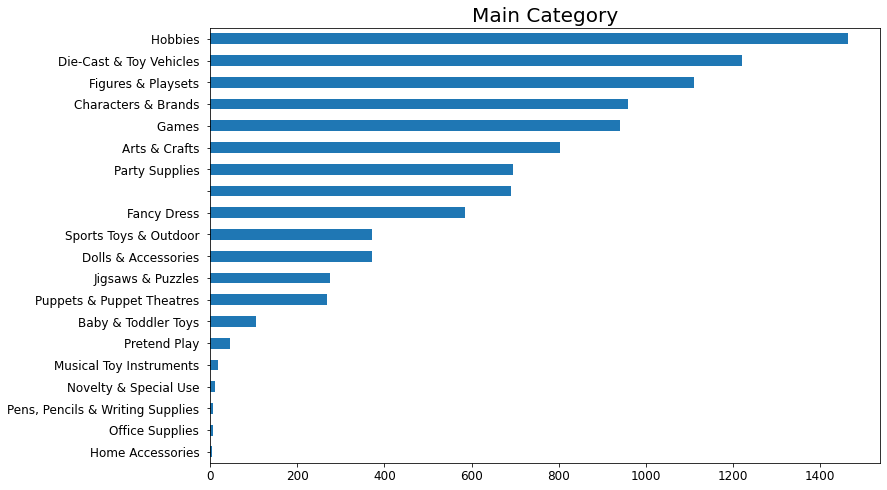

In [54]:
plt.figure(figsize=(12,8))
MainCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [55]:
SecondaryCategory = df['amazon_category_and_sub_category'].str.split('>',2).str[1]

In [56]:
print('Top Ten Sub Categories.\n')
print(SecondaryCategory.value_counts()[:10]) 

Top Ten Sub Categories.

 Toy Vehicles & Accessories       1100
 Science Fiction & Fantasy         485
 Accessories                       388
 Model Trains & Railway Sets       386
 Trading Cards & Accessories       376
 Children's Craft Kits             369
 Disney                            347
 Banners, Stickers & Confetti      335
 Decorations                       317
 Dice & Dice Games                 298
Name: amazon_category_and_sub_category, dtype: int64


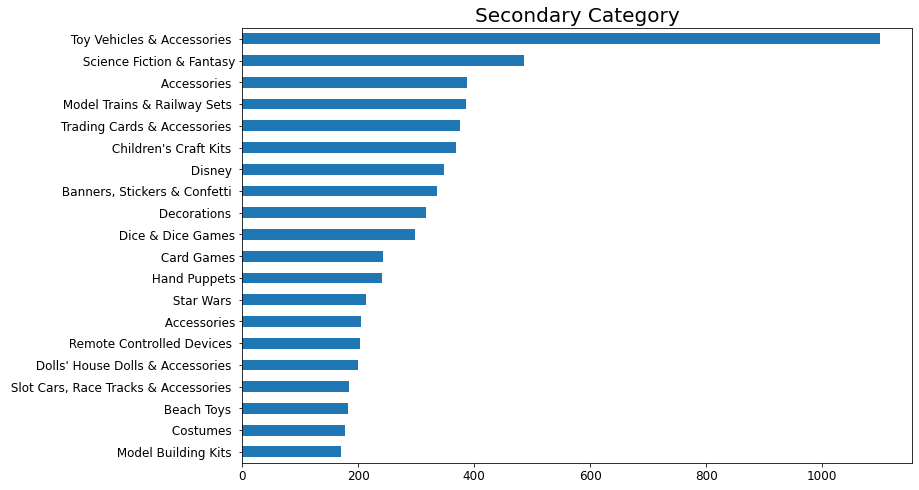

In [57]:
plt.figure(figsize=(12,8))
SecondaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [58]:
TertiaryCategory= df['amazon_category_and_sub_category'].str.split('>',3).str[2]

In [59]:
print('Top Ten Tertiary Categories.\n')
print(TertiaryCategory.value_counts()[:10]) 

Top Ten Tertiary Categories.

 Scaled Models                  912
 Toys                           623
 Bead Art & Jewellery-Making    368
 Packs & Sets                   317
 Balloons                       293
 Banners                        278
 Rail Vehicles                  264
 Masks                          188
 Dolls' House Accessories       172
 Adults                         169
Name: amazon_category_and_sub_category, dtype: int64


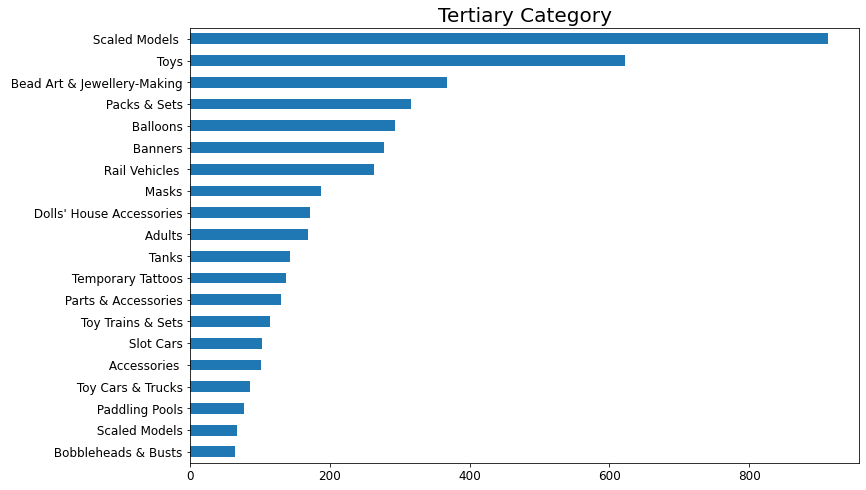

In [60]:
plt.figure(figsize=(12,8))
TertiaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [61]:
QuaternaryCategory = df['amazon_category_and_sub_category'].str.split('>',4).str[3]

In [62]:
print('Top Ten Quaternary Categories.\n')             
print(QuaternaryCategory.value_counts()[:10])

Top Ten Quaternary Categories.

 Vehicles                       880
 Trains                         176
 Locomotives                     88
 Figures & Decoration Parts      43
 Landscaping                     42
 Sleeves                         32
 Boats                           18
 Signal & Sound                  13
 Buttons & Pins                  10
 Albums                           9
Name: amazon_category_and_sub_category, dtype: int64


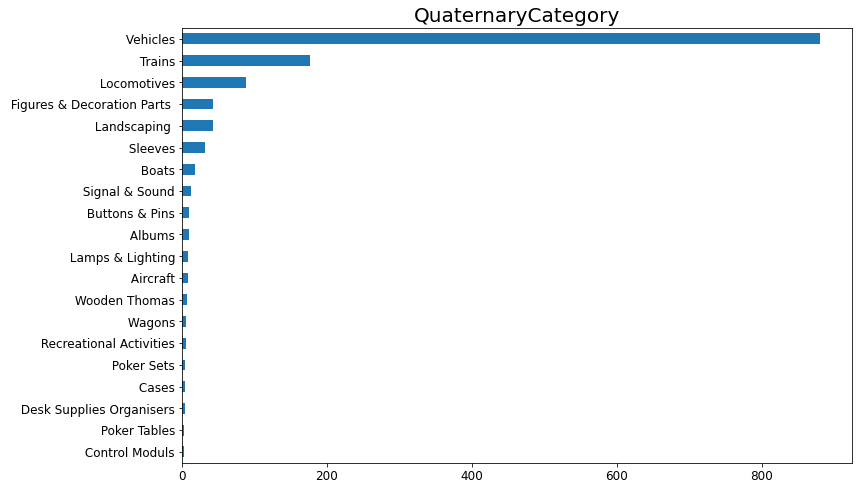

In [63]:
plt.figure(figsize=(12,8))
QuaternaryCategory.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('QuaternaryCategory',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

<AxesSubplot:xlabel='average_review_rating', ylabel='number_of_reviews'>

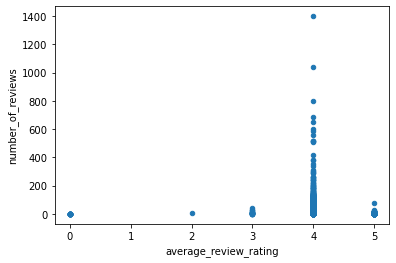

In [64]:
df.plot(kind='scatter', x='average_review_rating', y='number_of_reviews')

Scatter plot between number_of_reviews and average_review_rating having ratings maximum between 4-5 out of 5 which indicates that products sold are good in quality and preferred for purchase by customers.

In [65]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'product_information',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers', 'description_of_product', 'number_available',
       'number_availability_status'],
      dtype='object')

In [66]:
data = df[['product_name','manufacturer','amazon_category_and_sub_category','product_information','customer_reviews','description_of_product']]
data

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product
0,Hornby 2014 Catalogue,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Worth Buying For The Pictures Alone (As Ever) ...,description Product Description Hor...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,description Size Name:Large FunkyBu...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,description BIG CLASSIC TOY TRAIN S...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight259 g Product Dim...,I love it // 5.0 // 22 July 2013 // By\n \n...,description Hornby 00 Gauge BR Hawk...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight159 g Product Dim...,Birthday present // 5.0 // 14 April 2014 // By...,description Product Description Hor...
...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight136 g Product Dim...,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,description DC 66 Batman Classic TV...
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,Characters & Brands > Star Wars > Toys,Technical Details Additional Information AS...,... what I see my grandson us going to have fu...,description NaN\nproduct_descriptio...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,description *Includes 1x Badge with...
9998,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,The best sculpt in a while // 5.0 // 13 May 20...,description Designed by Ed BenesIt'...


In [67]:
data.loc[(data.manufacturer == 'Mattel')]

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product
86,Thomas and Friends Track Master Dockside Deliv...,Mattel,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight141 g Product Dim...,Five Stars // 5.0 // 17 Dec. 2015 // By\n \...,description Trackmaster Revolution ...
713,Monster High advents calendar,Mattel,,Technical Details Item Weight522 g Product Dim...,Quite a few windows empty !!!! // 4.0 // 13 De...,description Monster High advents ca...
731,Mattel BCK27 - Angry Birds Advent Calendar,Mattel,,Technical Details Item Weight544 g Product Dim...,Four Stars // 4.0 // 11 Oct. 2015 // By\n \...,description Angry Birds Advent Cale...
797,Matchbox Cars - 60th Anniversary Collection - ...,Mattel,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Technical Details Manufacturer recommended age...,Five Stars // 5.0 // 19 Jan. 2015 // By\n \...,description NaN\nproduct_descriptio...
799,Disney Pixar BDW82 Cars Jessica Giampetrol & N...,Mattel,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Technical Details Item Weight109 g Product Dim...,Five Stars // 5.0 // 19 Dec. 2015 // By\n \...,description Disney/Pixar Cars Colle...
...,...,...,...,...,...,...
9898,Mattel - Scene It? Friends DVD Game,Mattel,Games > DVD Games,Technical Details Item Weight3 Kg Product Dime...,The perfect game for Friends Addicts! // 4.0 /...,description Product Description Be ...
9915,FIFA Scene It? DVD Game,Mattel,Games > DVD Games,Technical Details Item Weight1.1 Kg Product Di...,Great game // 5.0 // 29 Jun. 2013 // By\n \...,description Product Description Maj...
9933,Scene it? Magical Moments Disney DVD Game,Mattel,Characters & Brands > Disney > Toys,Technical Details Item Weight699 g Product Dim...,A Must for Disney Fans Everywhere // 5.0 // 10...,description Scene it? Magical Momen...
9979,Albus Dumbledore (Harry Potter Magical Minis C...,Mattel,Characters & Brands > Harry Potter > Toys,Technical Details Item Weight118 g Product Dim...,great // 5.0 // 4 Nov. 2013 // By\n \n l...,description NaN\nproduct_descriptio...


In [68]:
data['manufacturer'].value_counts()

LEGO                 171
Disney               167
Oxford Diecast       156
Playmobil            147
Star Wars            120
                    ... 
Zigamazoo              1
Baby Celebrations      1
Foxy Facemasks         1
esscosa                1
Scrunch Buckets        1
Name: manufacturer, Length: 2652, dtype: int64

In [69]:
# to remove punctuations from description_of_product
data['description_of_product'] = data['description_of_product'].str.replace('[^\w\s]','')

In [70]:
# to extract key words from description_of_product to a list
data['Key_words'] = ''   # initializing a new column
r = Rake()   # use Rake to discard stop words (based on english stopwords from NLTK)

for index, row in data.iterrows():
    r.extract_keywords_from_text(row['description_of_product'])   # to extract key words from description_of_product, default in lower case
    key_words_dict_scores = r.get_word_degrees()    # to get dictionary with key words and their scores
    row['Key_words'] = list(key_words_dict_scores.keys())   # to assign list of key words to new column

data

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product,Key_words
0,Hornby 2014 Catalogue,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Worth Buying For The Pictures Alone (As Ever) ...,description Product Description Hor...,"[description, product, hornby, 2014, catalogue..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,description Size NameLarge FunkyBuy...,"[description, size, namelarge, funkybuys, larg..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,description BIG CLASSIC TOY TRAIN S...,"[description, big, classic, toy, train, set, t..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight259 g Product Dim...,I love it // 5.0 // 22 July 2013 // By\n \n...,description Hornby 00 Gauge BR Hawk...,"[description, hornby, 00, gauge, br, hawkswort..."
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight159 g Product Dim...,Birthday present // 5.0 // 14 April 2014 // By...,description Product Description Hor...,"[description, product, hornby, railroad, 040, ..."
...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight136 g Product Dim...,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,description DC 66 Batman Classic TV...,"[description, dc, 66, batman, classic, tv, ser..."
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,Characters & Brands > Star Wars > Toys,Technical Details Additional Information AS...,... what I see my grandson us going to have fu...,description NaN\nproduct_descriptio...,"[description, nan, product_description, name, ..."
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,description Includes 1x Badge with ...,"[description, includes, 1x, badge, holder, cha..."
9998,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,The best sculpt in a while // 5.0 // 13 May 20...,description Designed by Ed BenesIts...,"[description, designed, ed, benesits, third, s..."


In [71]:
# to see last item in description_of_product
data['description_of_product'][9999]

'description            NaN\nproduct_description    NaN\nName 9999 dtype object'

In [72]:
# to see last dictionary extracted from description_of_product
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'description': 8,
             'nan': 16,
             'product_description': 8,
             'name': 8,
             '9999': 8,
             'dtype': 8,
             'object': 8})

In [73]:
data['Key_words'][9999]

['description',
 'nan',
 'product_description',
 'name',
 '9999',
 'dtype',
 'object']

In [74]:
data.columns

Index(['product_name', 'manufacturer', 'amazon_category_and_sub_category',
       'product_information', 'customer_reviews', 'description_of_product',
       'Key_words'],
      dtype='object')

In [75]:
# to extract columns into a list
data['customer_reviews'] = data['customer_reviews'].map(lambda x: x.split('\\'))
data['amazon_category_and_sub_category'] = data['amazon_category_and_sub_category'].map(lambda x: x.split('>')[:3])


# convert to lowercase 
for index, row in df.iterrows():
    row['customer_reviews'] = [x.lower().replace(' ','') for x in row['customer_reviews']]
    row['amazon_category_and_sub_category'] = [x.lower().replace(' ','') for x in row['amazon_category_and_sub_category']]
    row['manufacturer'] = [x.lower().replace(' ','') for x in row['manufacturer']]
data

,product_name,manufacturer,amazon_category_and_sub_category,product_information,customer_reviews,description_of_product,Key_words
0,Hornby 2014 Catalogue,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight640 g Product Dim...,[Worth Buying For The Pictures Alone (As Ever)...,description Product Description Hor...,"[description, product, hornby, 2014, catalogue..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Manufacturer recommended age...,[Four Stars // 4.0 // 18 Dec. 2015 // By\n ...,description Size NameLarge FunkyBuy...,"[description, size, namelarge, funkybuys, larg..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Manufacturer recommended age...,[**Highly Recommended!** // 5.0 // 26 May 2015...,description BIG CLASSIC TOY TRAIN S...,"[description, big, classic, toy, train, set, t..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight259 g Product Dim...,[I love it // 5.0 // 22 July 2013 // By\n \...,description Hornby 00 Gauge BR Hawk...,"[description, hornby, 00, gauge, br, hawkswort..."
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,"[Hobbies , Model Trains & Railway Sets , Rai...",Technical Details Item Weight159 g Product Dim...,[Birthday present // 5.0 // 14 April 2014 // B...,description Product Description Hor...,"[description, product, hornby, railroad, 040, ..."
...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,"[Hobbies , Collectible Figures & Memorabilia ...",Technical Details Item Weight136 g Product Dim...,[Realistic // 5.0 // 31 Mar. 2014 // By\n \...,description DC 66 Batman Classic TV...,"[description, dc, 66, batman, classic, tv, ser..."
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,"[Characters & Brands , Star Wars , Toys]",Technical Details Additional Information AS...,[... what I see my grandson us going to have f...,description NaN\nproduct_descriptio...,"[description, nan, product_description, name, ..."
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,"[Novelty & Special Use , Novelty , Accessori...",Technical Details Item Weight159 g Product Dim...,[Five Stars // 5.0 // 18 Dec. 2015 // By\n ...,description Includes 1x Badge with ...,"[description, includes, 1x, badge, holder, cha..."
9998,Justice League of America Series 3 Green Lante...,DC Comics,"[Hobbies , Collectible Figures & Memorabilia ...",Technical Details Item Weight181 g Product Dim...,[The best sculpt in a while // 5.0 // 13 May 2...,description Designed by Ed BenesIts...,"[description, designed, ed, benesits, third, s..."


In [76]:
data['Bag_of_words'] = ''
columns = ['manufacturer', 'amazon_category_and_sub_category', 'customer_reviews', 'Key_words']

for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
# strip white spaces infront and behind, replace multiple whitespaces (if any)
data['Bag_of_words'] = data['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

data = data[['product_name','Bag_of_words']]
data

KeyError: 'Key_words'

In [ ]:
# an example to see what is in the Bag_of_words
data['Bag_of_words'][0]

In [ ]:
# to generate the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data['Bag_of_words'])
count_matrix

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

In [ ]:
indices = pd.Series(data['product_name'])
indices[:5]

In [ ]:

def recommend(product_name, cosine_sim = cosine_sim):
    recommended_toys = []
    idx = indices[indices == product_name].index[0]   # to get the index of the toy matching the input toy
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most similar toys
    # [1:11] to exclude 0 (index 0 is the input movie itself)
    
    for i in top_10_indices:   # to append the titles of top 10 similar movies to the recommended_movies list
        recommended_toys.append(list(data['product_name'])[i])
        
    return recommended_toys

recommend('Disney Dancing Plush Doll Series Minnie Mouse')

In [ ]:
recommend('Elegant Lego Friends Advent Calendar 3316 With 24 Gifts, Mini Dolls, A Dog And Accessories')

In [ ]:
recommend('Early Learning Centre Magnetic Letters - Upper Case')